# Data Description:
The file Bank.xls contains data on 5000 customers. The data include
customer demographic information (age, income, etc.), the customer's
relationship with the bank (mortgage, securities account, etc.), and the
customer response to the last personal loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal
loan that was offered to them in the earlier campaign.

# Domain:
Banking

Context:
This case is about a bank (Thera Bank) whose management wants to
explore ways of converting its liability customers to personal loan
customers (while retaining them as depositors). A campaign that the
bank ran last year for liability customers showed a healthy conversion
rate of over 9% success. This has encouraged the retail marketing
department to devise campaigns with better target marketing to
increase the success ratio with a minimal budget.

# Attribute Information:
ID : Customer ID <br>
Age : Customer's age in completed years <br>
Experience : #years of professional experience <br>
Income : Annual income of the customer in thousands dollar <br>
ZIP Code : Home Address ZIP code <br>
Family : Family size of the customer <br>
CCAvg : Avg. spending on credit cards per month in thousands dollar <br>
Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional <br>
Mortgage : Value of house mortgage if any in thousands dollar <br>
Personal Loan : Did this customer accept the personal loan offered in
the last campaign? <br>
Securities Account : Does the customer have a securities account with
the bank? <br>
CD Account : Does the customer have a certificate of deposit <br>
(CD) account with the bank? <br>
Online : Does the customer use internet banking facilities? <br>
Credit card : Does the customer use a credit card issued byUniversalBank? <br>

# Learning Outcomes:
• Exploratory Data Analysis <br>
• Preparing the data to train a model <br>
• Training and making predictions using a classification model <br>
• Model evaluation <br>

Objective:
The classification goal is to predict the likelihood of a liability customer
buying personal loans.

In [584]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math # log function is inside this library
# this is used to get the plots inline i.e. in the same page
from collections import Counter
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 1. Read the column description and ensure you understand each attribute well

In [585]:
# read the csv file into a dataframe
df_bank_data=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df_bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [586]:
# Replacing the categorical var 'education' with actual values for proper understanding
df_bank_data['Education'] = df_bank_data['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})
df_bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [587]:
df_bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


Min value for experience is -3 that means it has negative values which is not correct so replace it with mean value

In [588]:
df_bank_data[(df_bank_data['Experience'] < 0)].shape 

(52, 14)

Total rows with -ve experience values are 52

In [589]:
Experience_median = df_bank_data.loc[:,"Experience"].median()
df_bank_data.loc[:, 'Experience'].replace([-1, -2, -3], [Experience_median, Experience_median, Experience_median], inplace=True)


In [590]:
df_bank_data[(df_bank_data['Experience'] < 0)].shape

(0, 14)

No more negative "Experience" values 

In [591]:
df_bank_data.info()  #check null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null float64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null object
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 547.0+ KB


In [592]:
df_bank_data.isnull().values.sum()  #check for null values

0

In [593]:
df_bank_data.isnull().values.any() #check for missing values

False

In [594]:
#EDA
df_bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [595]:
df_bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


# Observations :-  <br>

# Columns Types

### Categorical Feature:


- Family <br>
- Education <br>
- ID <br>
- Zip Code <br>
- Securities Account <br>
- CD Account <br>
- Online <br>
- Credit Card <br>

### Numerical feature:
    
- Age <br>
- Experience <br>
- Income <br>
- CCAvg <br>
- Mortage <br>

# Data
No null values <br>
No missing values  <br>
Replaced negative values with median  <br>

# Plot histograms for continuous variables

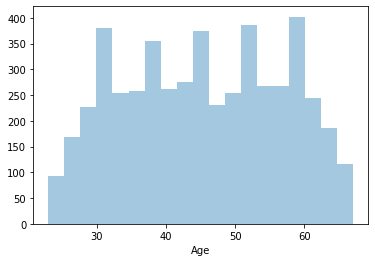

In [596]:
sns.distplot(df_bank_data['Age'],kde=False)

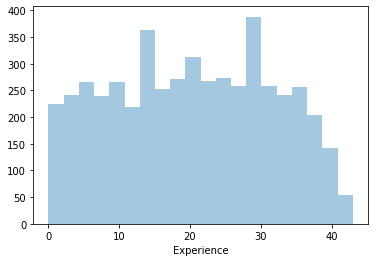

In [597]:
sns.distplot(df_bank_data['Experience'],kde=False)

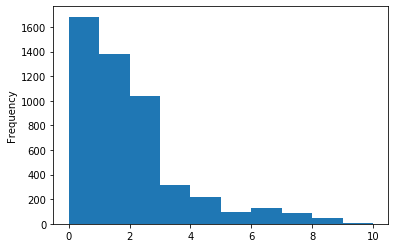

In [598]:
df_bank_data['CCAvg'].plot(kind='hist')

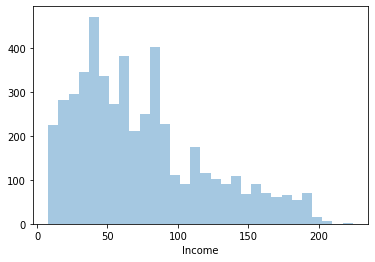

In [599]:
sns.distplot(df_bank_data['Income'],kde=False, bins = 30)

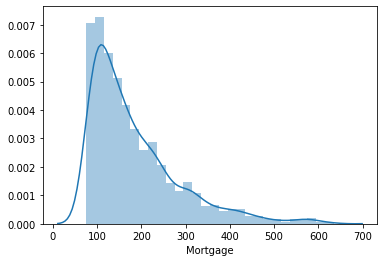

In [600]:
mortgage_data = df_bank_data[df_bank_data['Mortgage']>0]
sns.distplot(mortgage_data['Mortgage'])

# Observation

Age & Experience seems to be quiet normally distributed

Income, CC Average & Mortgage are highly skewed

In [601]:
pd.DataFrame(df_bank_data['Education'].value_counts().to_frame()).T

,Undergrad,Advanced/Professional,Graduate
Education,2096,1501,1403


# Checking the presence of outliers and skewness

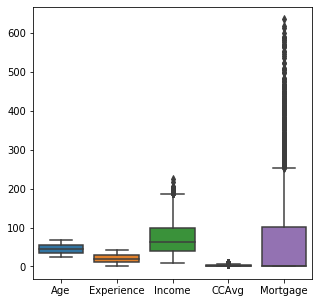

In [602]:
# Boxplot
plt.figure(figsize=(5,5))

temp_df = df_bank_data.drop(['ID','ZIP Code','Securities Account','Education','CD Account','Online','CreditCard','Personal Loan','Family'], axis=1)
sns.boxplot(data=temp_df)

In [603]:
temp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


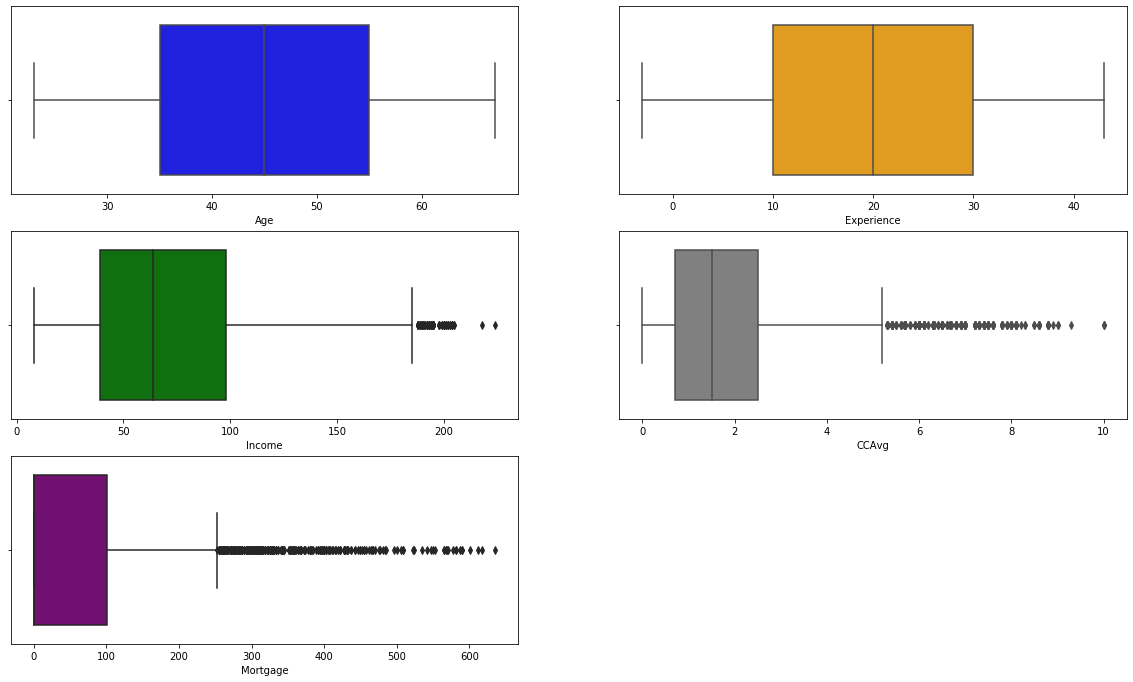

In [604]:
plt.figure(figsize= (20,20))
plt.subplot(5,2,1)
sns.boxplot(x= df.Age, color='blue')

plt.subplot(5,2,2)
sns.boxplot(x= df.Experience, color='orange')

plt.subplot(5,2,3)
sns.boxplot(x= df.Income, color='green')

plt.subplot(5,2,4)
sns.boxplot(x= df.CCAvg, color='grey')

plt.subplot(5,2,5)
sns.boxplot(x= df.Mortgage, color='purple')


## Inference

1. Age feature is normally distributed with majority of customers falling between 35 years and 55 years of age. We can infer from the boxplot above, and also in info attained from describe() shows mean is almost equal to median.

2. Experience is normally distributed with more customer having experience starting from 11 years to 30 Years. Here also the mean is equal to median.

3. Income is positively skewed. Majority of the customers have income between 39K and 98K ie from Q1 to Q3. 

4. CCAvg is also a positively skewed. There are a large numner of outliers.


## Categorical Column Analysis

In [605]:
pd.DataFrame(df_bank_data['Personal Loan'].value_counts().to_frame()).T

,0,1
Personal Loan,4520,480


In [606]:
pd.DataFrame(df_bank_data['CD Account'].value_counts().to_frame()).T

,0,1
CD Account,4698,302


In [607]:
pd.DataFrame(df_bank_data['Securities Account'].value_counts().to_frame()).T

,0,1
Securities Account,4478,522


In [608]:
pd.DataFrame(df_bank_data['CreditCard'].value_counts().to_frame()).T

,0,1
CreditCard,3530,1470


In [609]:
pd.DataFrame(df_bank_data['Online'].value_counts().to_frame()).T

,1,0
Online,2984,2016


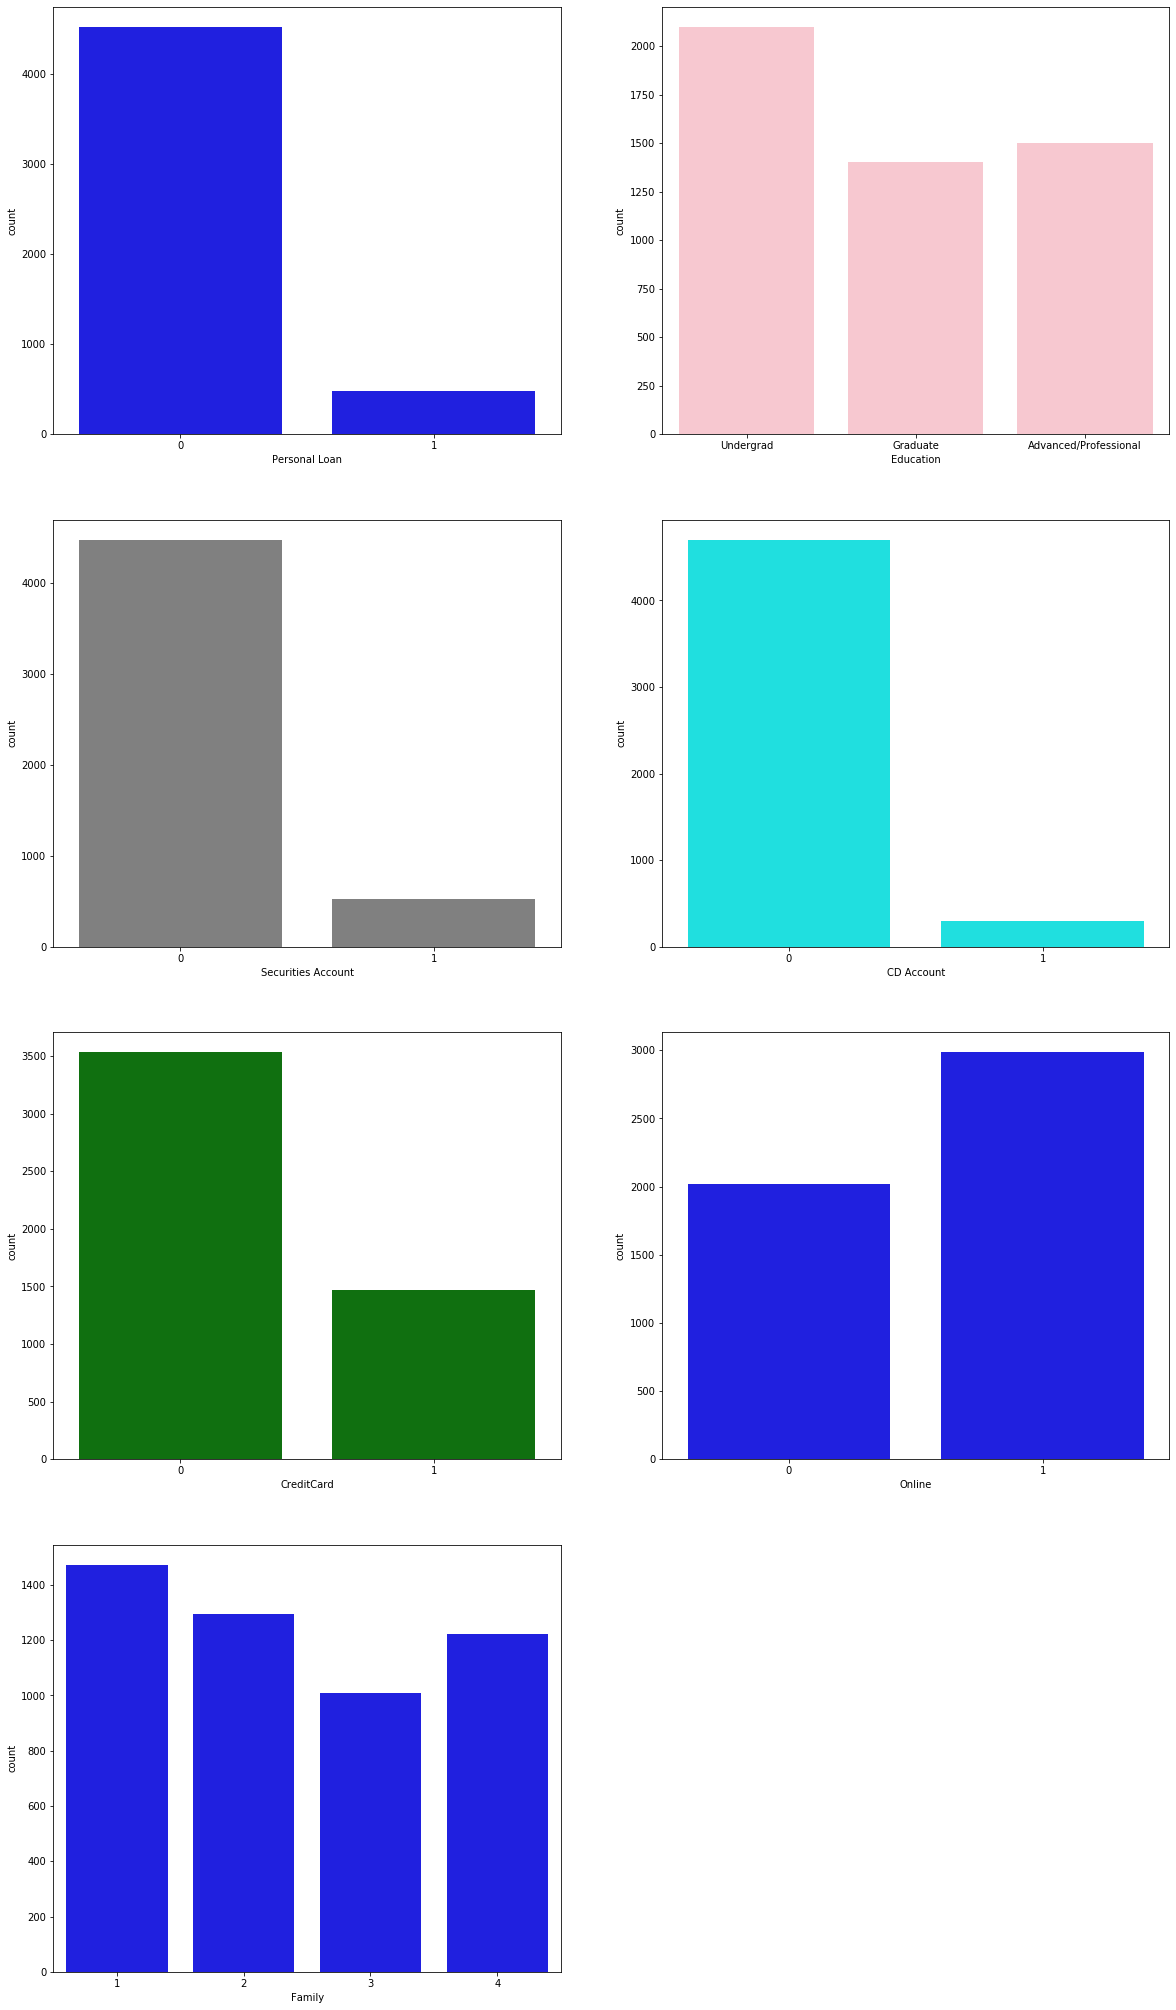

In [610]:
plt.figure(figsize=(20,55))

plt.subplot(6,2,1)
sns.countplot(df_bank_data['Personal Loan'],color = 'blue')


plt.subplot(6,2,2)
sns.countplot(df_bank_data['Education'],color = 'pink')

plt.subplot(6,2,3)
sns.countplot(df_bank_data['Securities Account'],color = 'grey')

plt.subplot(6,2,4)
sns.countplot(df_bank_data['CD Account'],color = 'cyan')

plt.subplot(6,2,5)
sns.countplot(df_bank_data['CreditCard'],color = 'green')

plt.subplot(6,2,6)
sns.countplot(df_bank_data['Online'],color = 'blue')

plt.subplot(6,2,7)
sns.countplot(df_bank_data['Family'],color = 'blue')

# Observations: <br>
* ## Dependent Variable <br>
Personal Loan (480/5000) = 9.6% accepted the personal loan that was offered <br><br>

* ## Independent Variable <br>
Securities account are possesed by very less number of ppl ie  (522/5000)  ie  8.4% <br>
CD account are possesed by very less number of ppl ie  (302/5000)  ie  6.04% <br>
Online account are possesed by very large number of ppl ie  (2884/5000)  ie  59% <br>
Education, Family are almost equally distributed

# Relationship between Personal Loan and other independent variables

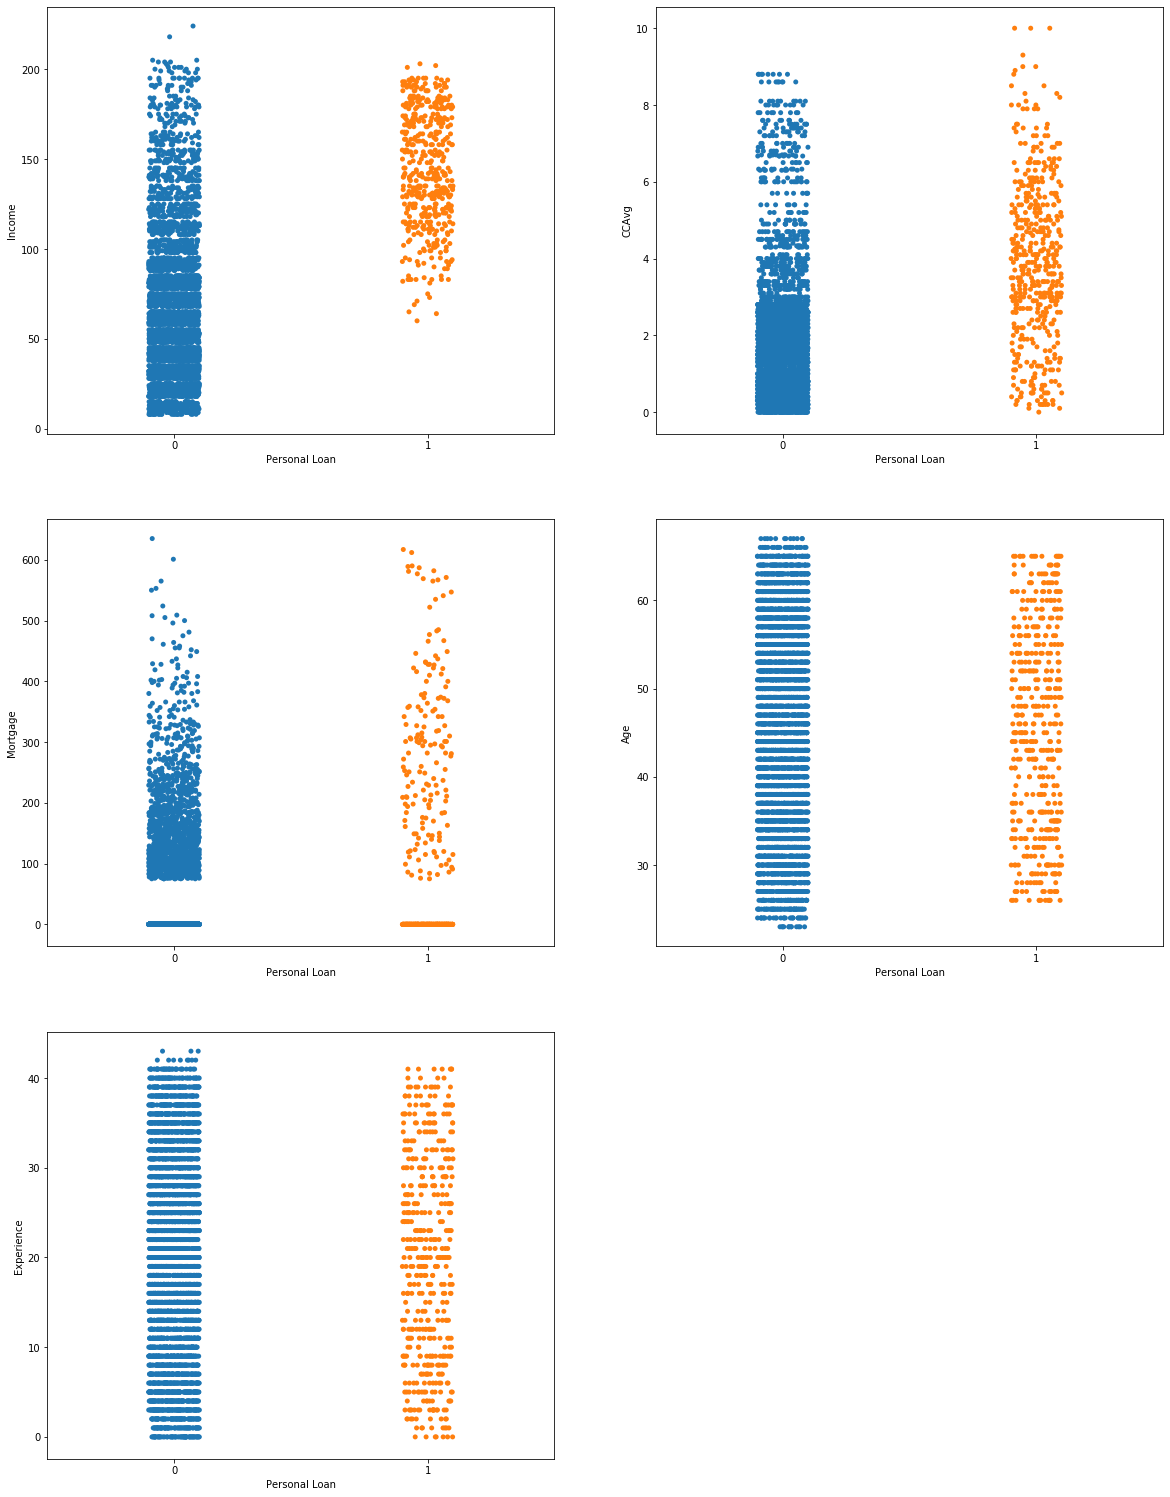

In [611]:
plt.figure(figsize=(20,55))

plt.subplot(6,2,1)
sns.stripplot(df_bank_data['Personal Loan'], df_bank_data['Income']) #People with higher income tends to take more personal loan

plt.subplot(6,2,2)
sns.stripplot(df_bank_data['Personal Loan'], df_bank_data['CCAvg'])

plt.subplot(6,2,3)
sns.stripplot(df_bank_data['Personal Loan'], df_bank_data['Mortgage'])

plt.subplot(6,2,4)
sns.stripplot(df_bank_data['Personal Loan'], df_bank_data['Age'])

plt.subplot(6,2,5)
sns.stripplot(df_bank_data['Personal Loan'], df_bank_data['Experience'])

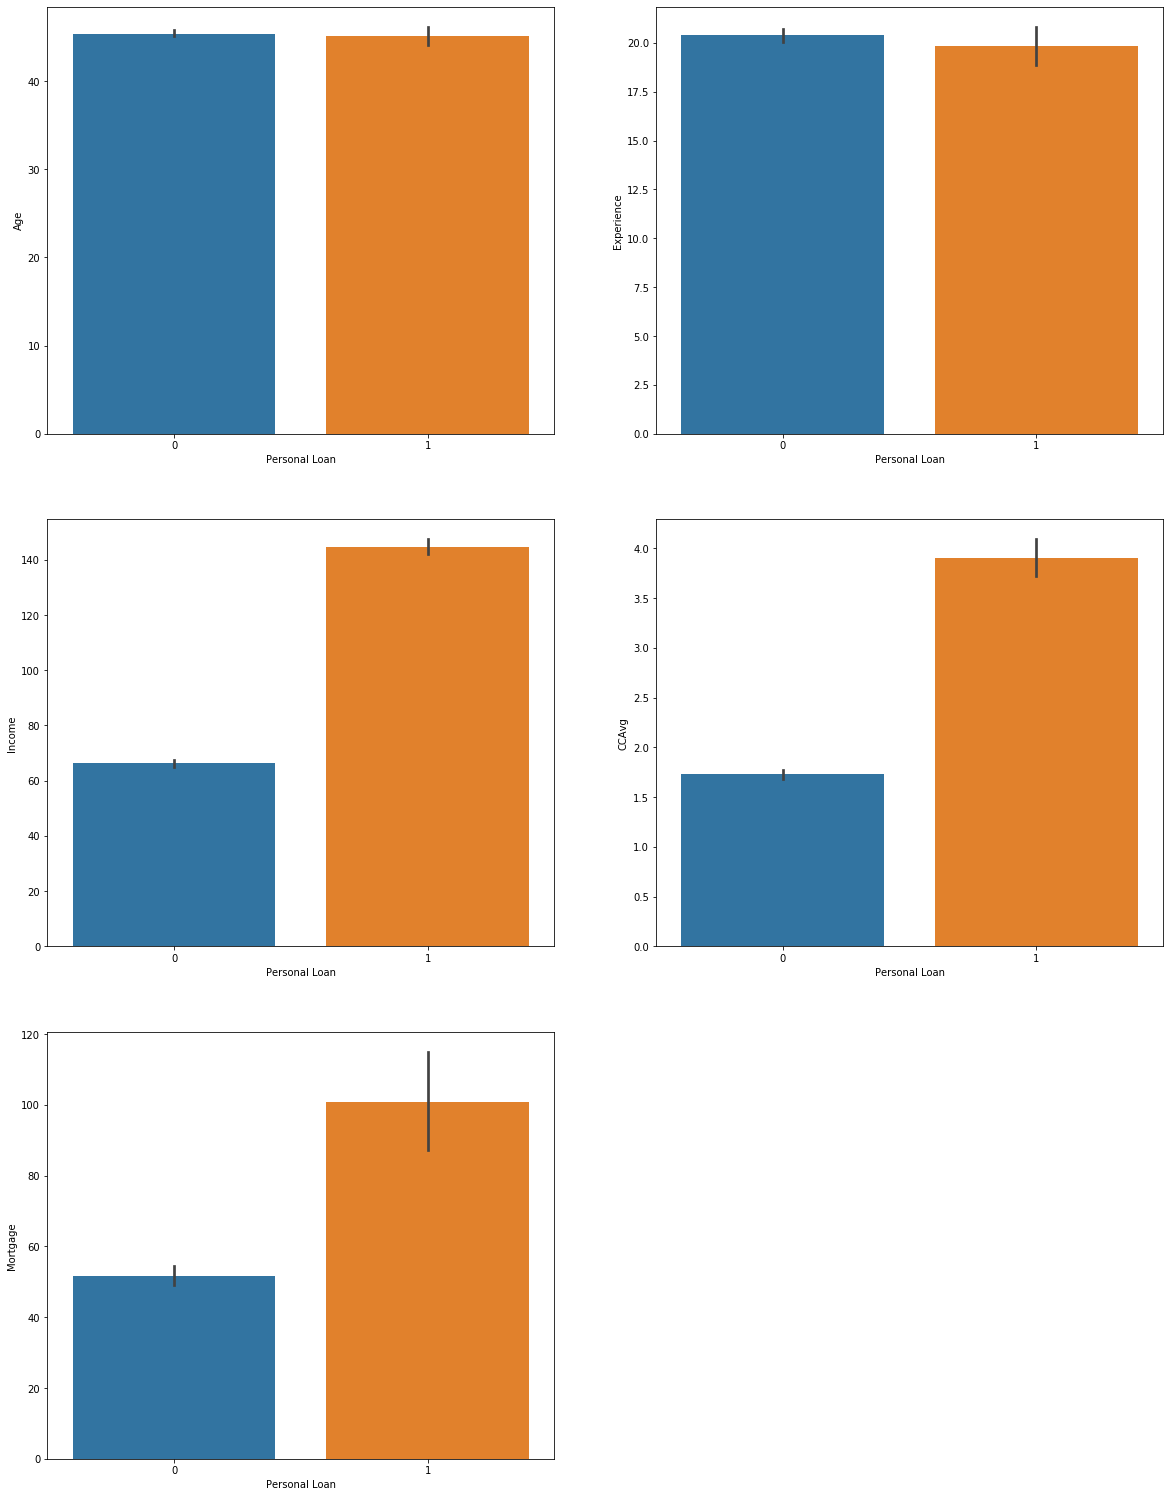

In [612]:
plt.figure(figsize=(20,55))

plt.subplot(6,2,1)
sns.barplot(df_bank_data['Personal Loan'], df_bank_data['Age'])

plt.subplot(6,2,2)
sns.barplot(df_bank_data['Personal Loan'], df_bank_data['Experience'])

plt.subplot(6,2,3)
sns.barplot(df_bank_data['Personal Loan'], df_bank_data['Income'])

plt.subplot(6,2,4)
sns.barplot(df_bank_data['Personal Loan'], df_bank_data['CCAvg'])

plt.subplot(6,2,5)
sns.barplot(df_bank_data['Personal Loan'], df_bank_data['Mortgage'])

# Observations: <br>

*Personal Loan doesnt seem to be much affected by age or experience <br>
*Income affects personal loan, higher the income more acceptance towards personal loan. <br>
*People with higher CCAvg are few but are more prone to accept personal loan

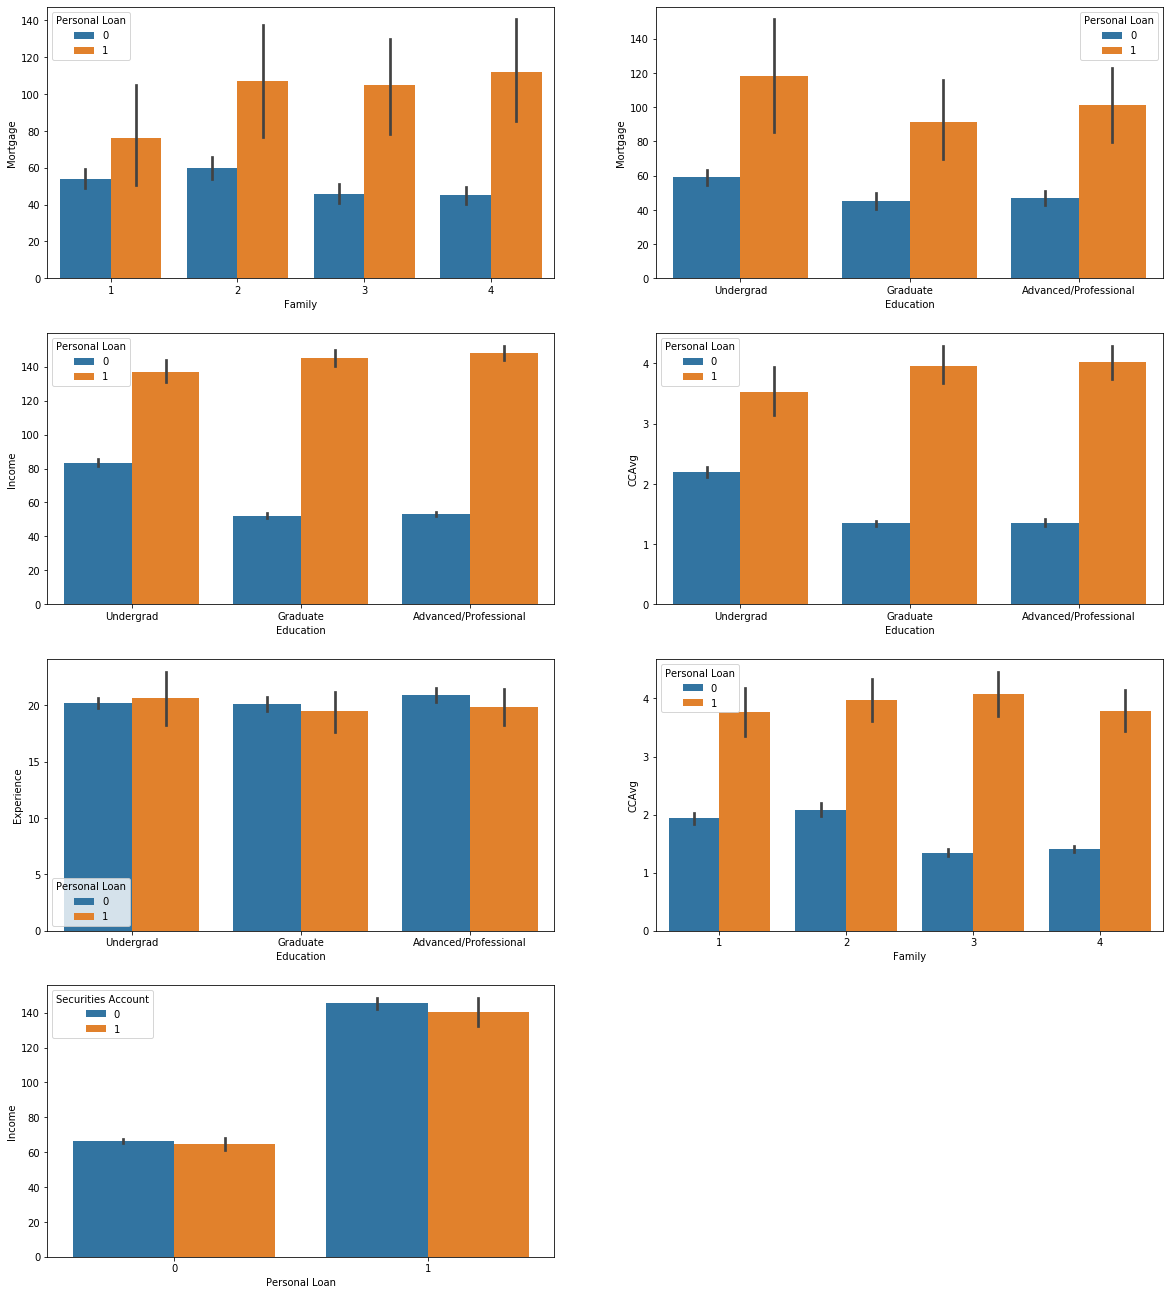

In [613]:
plt.figure(figsize=(20,35))

plt.subplot(6,2,1)
sns.barplot(df_bank_data['Family'], df_bank_data['Mortgage'], hue=df_bank_data['Personal Loan'])

plt.subplot(6,2,2)
sns.barplot(df_bank_data['Education'], df_bank_data['Mortgage'], hue=df_bank_data['Personal Loan'])

plt.subplot(6,2,3)
sns.barplot(df_bank_data['Education'], df_bank_data['Income'], hue=df_bank_data['Personal Loan'])

plt.subplot(6,2,4)
sns.barplot(df_bank_data['Education'], df_bank_data['CCAvg'], hue=df_bank_data['Personal Loan'])

plt.subplot(6,2,5)
sns.barplot(df_bank_data['Education'], df_bank_data['Experience'], hue=df_bank_data['Personal Loan'])

plt.subplot(6,2,6)
sns.barplot(df_bank_data['Family'], df_bank_data['CCAvg'], hue=df_bank_data['Personal Loan'])

plt.subplot(6,2,7)
sns.barplot(df_bank_data['Personal Loan'], df_bank_data['Income'], hue=df_bank_data['Securities Account'])

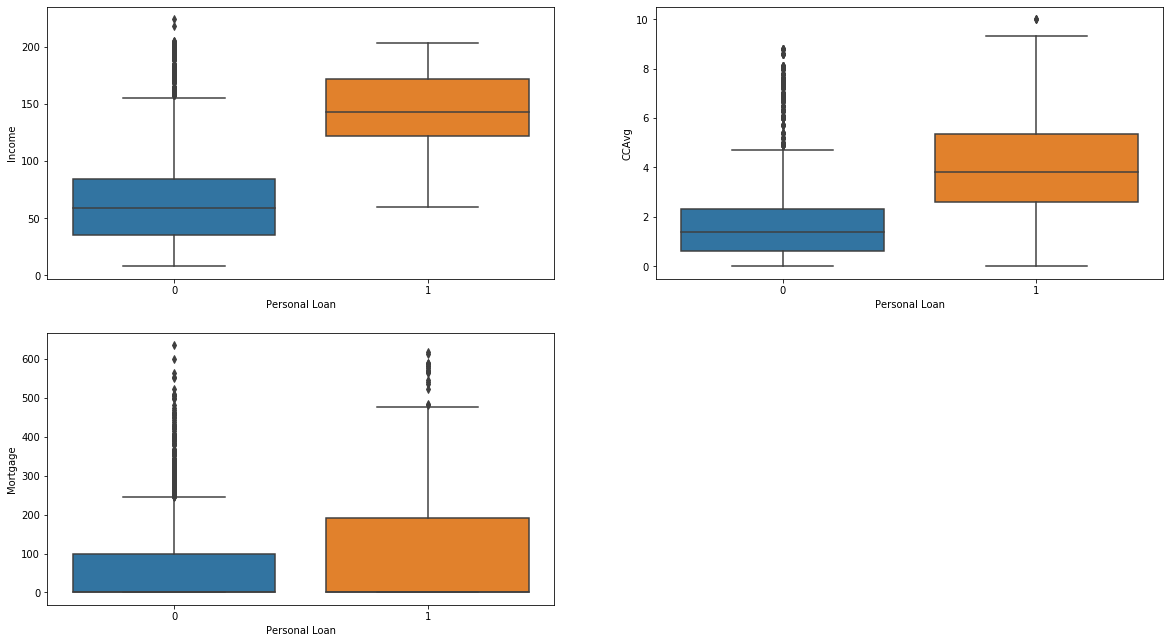

In [614]:
plt.figure(figsize=(20,35))

plt.subplot(6,2,1)
sns.boxplot(x="Personal Loan",y="Income",data=df)

plt.subplot(6,2,2)
sns.boxplot(x="Personal Loan",y="CCAvg",data=df) 

plt.subplot(6,2,3)
sns.boxplot(x="Personal Loan",y="Mortgage",data=df) 


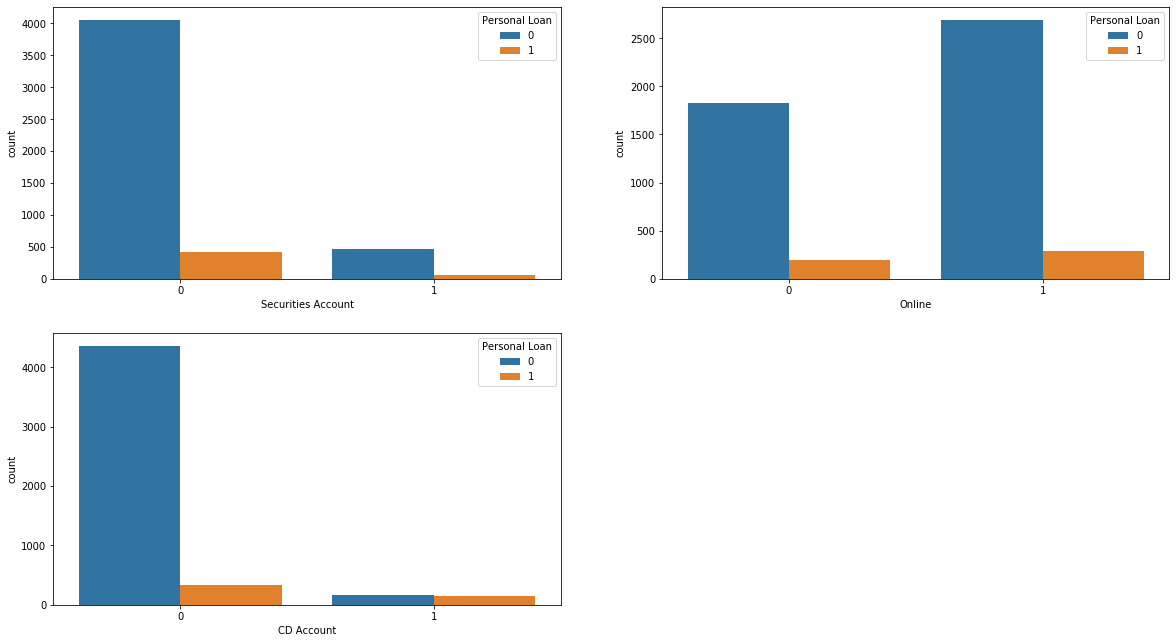

In [615]:
plt.figure(figsize=(20,35))

plt.subplot(6,2,1)
sns.countplot(x="Securities Account", data=df ,hue="Personal Loan")

plt.subplot(6,2,2)
sns.countplot(x="Online", data=df ,hue="Personal Loan")

plt.subplot(6,2,3)
sns.countplot(x="CD Account", data=df ,hue="Personal Loan")

## Observation  

- Age' has a very strong association with 'Experience' but nothing gets affected with loan attribute.
- Majority of customers who does not have loan is holding securities account, Whereas small proportion of customers having loan does hold but majority of them do not have securities account.
- Customers who does not have CD account, does not have loan as well, but almost all customers who has CD account has loan as well.
- People with higher income , CCAvg tends accept personal loan, however a lot of outliers exist in all scenarios

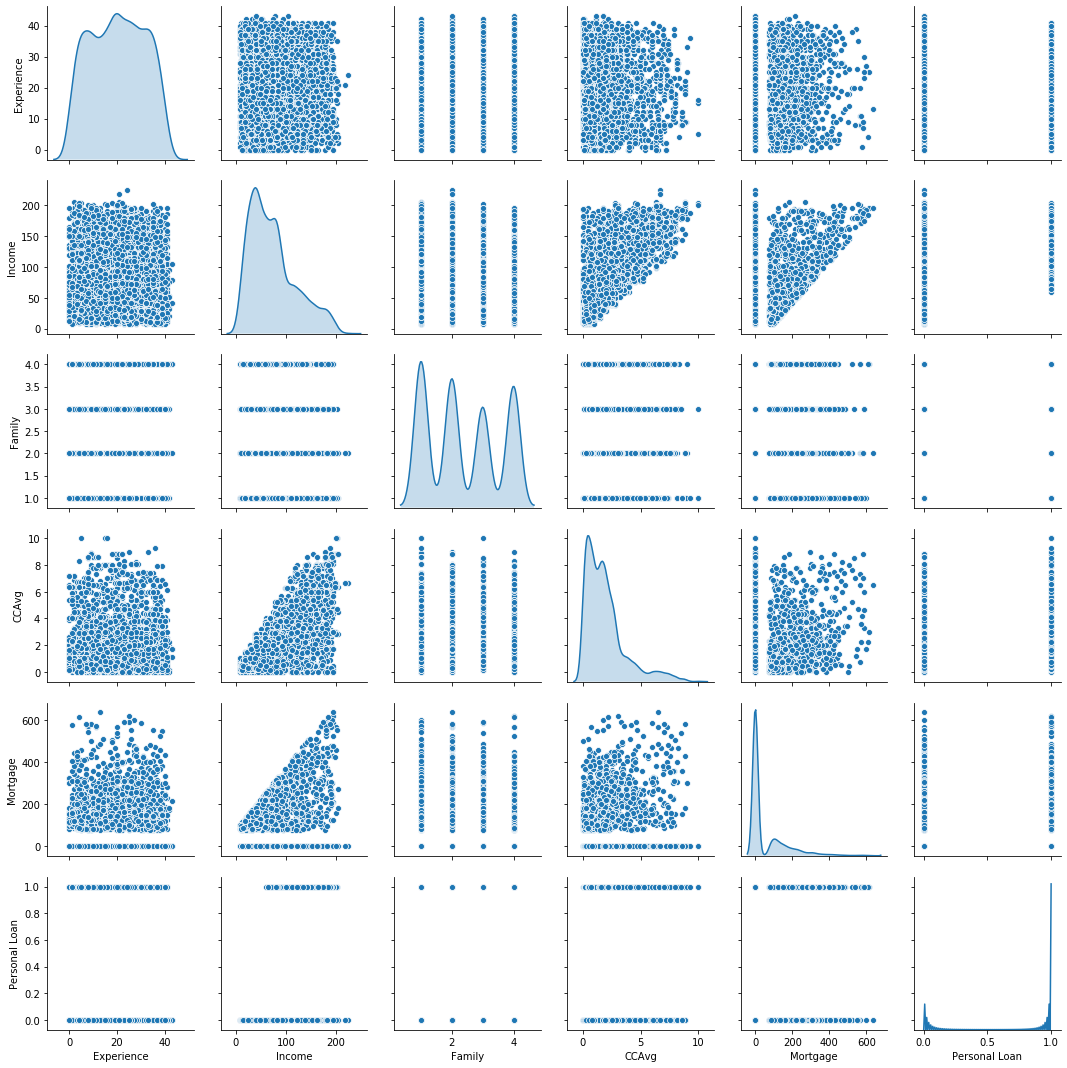

In [616]:
Pairplot_bank_df = df_bank_data.drop(['ID','Age','ZIP Code','Securities Account','CD Account','Online','CreditCard'], axis=1)
sns.pairplot(Pairplot_bank_df, diag_kind='kde')

In [617]:
df_bank_data.corr()  #correlation between income and personal loan is considerable

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024675,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.016972,-0.000436,-0.000465,-0.002616,0.004704,0.019994,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


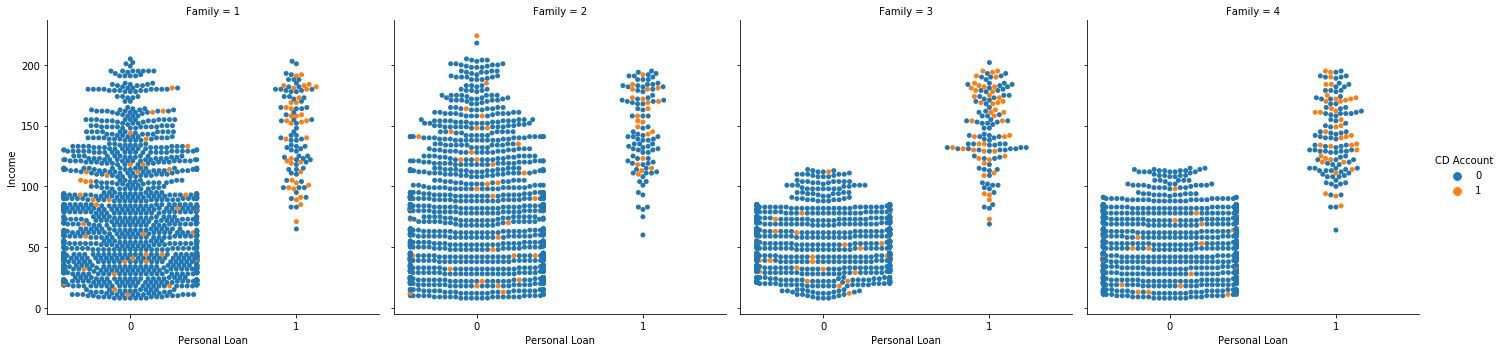

In [618]:
sns.factorplot(x="Personal Loan", 
               y="Income", 
               hue="CD Account", 
               col="Family", 
               data=df_bank_data, 
               kind="swarm")

# My findings:-
People with Higher income tend to take more personal loan <br>
People with Higher mortgage and higher credit card spending(CCAvg) and CD Account  has some correlation with personal loan


# Cleaning data before splitting into train/test ratio

In [619]:
df_bank_data.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


Drop ID and zipcode column from the data frame. They are not used in modeling

In [620]:
df_bank_data['Education'] = df_bank_data['Education'].replace({'Undergrad': 1, 'Graduate':2, 'Advanced/Professional':3})

In [621]:
df_bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [622]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = df_bank_data.drop(['Experience' ,'ID','ZIP Code'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
y = df_bank_data["Personal Loan"]
X.head()


,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


# Split X and y into training and test set in 70:30 ratio

In [623]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [624]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df_bank_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df_bank_data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [625]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df_bank_data.loc[df_bank_data['Personal Loan'] == 1]), (len(df_bank_data.loc[df_bank_data['Personal Loan'] == 1])/len(df_bank_data.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df_bank_data.loc[df_bank_data['Personal Loan'] == 0]), (len(df_bank_data.loc[df_bank_data['Personal Loan'] == 0])/len(df_bank_data.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



## Logistic Regression

In [626]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import model_selection


logmodel = LogisticRegression(solver="liblinear")
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [627]:
predictModel = logmodel.predict(X_test)
predictProb = logmodel.predict_proba(X_test)

coef_df = pd.DataFrame(logmodel.coef_)
coef_df['intercept'] = logmodel.intercept_
print(coef_df)

         0         1         2       3        4         5         6         7  \
0 -0.01866  0.041036  0.460824  0.1314  1.19762  0.000531 -0.909041  3.156868   

          8         9  intercept  
0 -0.604429 -1.035648  -9.208308  


In [628]:
logmodel.score(X_test, y_test)


0.9426666666666667

## Confusion Matrix for logistic model

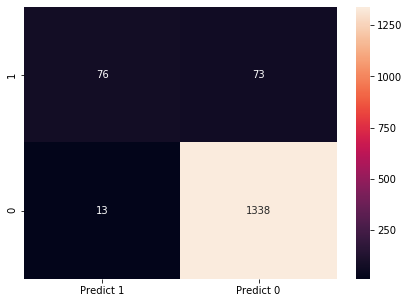

In [629]:
cm=metrics.confusion_matrix(y_test, predictModel, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = "d")

The confusion matrix

True Positives (TP): we correctly predicted that they accepted loan is 76

True Negatives (TN): we correctly predicted that they don't they accepted loan is  1338

False Positives (FP): we incorrectly predicted that they accepted loan is 13 (a "Type I error") 

False Negatives (FN): we incorrectly predicted that they don't accept loan is 73 (a "Type II error")

In [630]:
# Classification Report
print(classification_report(y_test, predictModel))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.51      0.64       149

    accuracy                           0.94      1500
   macro avg       0.90      0.75      0.80      1500
weighted avg       0.94      0.94      0.94      1500



# KNN Modelling

In [631]:
NNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )


In [632]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

In [633]:

predicted_models_KNN = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.908

## Confusion Matrix for KNN model

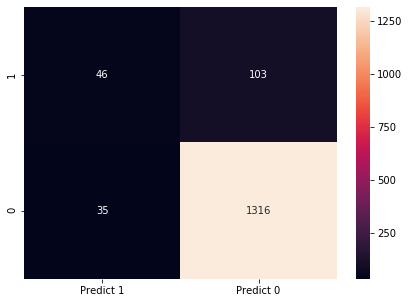

In [634]:
cm_KNN=metrics.confusion_matrix(y_test, predicted_models_KNN, labels=[1, 0])

df_cm_KNN = pd.DataFrame(cm_KNN, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_KNN, annot=True, fmt = "d")

The confusion matrix

True Positives (TP): we correctly predicted that they accepted loan is 46

True Negatives (TN): we correctly predicted that they don't they accepted loan is 1316

False Positives (FP): we incorrectly predicted that they accepted loan is 35 (a "Type I error")

False Negatives (FN): we incorrectly predicted that they don't accept loan is 103 (a "Type II error") 

In [635]:
# Classification Report
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.55      0.36      0.43       149

    accuracy                           0.91      1500
   macro avg       0.74      0.66      0.69      1500
weighted avg       0.89      0.91      0.90      1500



# Train Naive Bayes algorithm

In [636]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [637]:
naive_bayes_model_predict_train = naive_bayes_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, naive_bayes_model_predict_train)))
print()

Model Accuracy: 0.8894



In [638]:
naive_bayes_model_predict_test = naive_bayes_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, naive_bayes_model_predict_test)))
print()

Model Accuracy: 0.8747



# Confusion Matrix for Naive Bayes model

Confusion Matrix


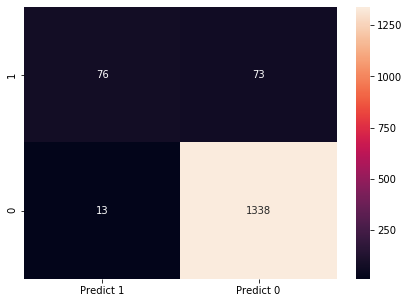

In [639]:
print("Confusion Matrix")
cm_Naive=metrics.confusion_matrix(y_test, naive_bayes_model_predict_test, labels=[1, 0])

df_cm_Naive = pd.DataFrame(cm_Naive, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt="d")

The confusion matrix

True Positives (TP): we correctly predicted that they accepted loan is 85

True Negatives (TN): we correctly predicted that they don't they accepted loan is 1227

False Positives (FP): we incorrectly predicted that they accepted loan is 124 (a "Type I error")

False Negatives (FN): we incorrectly predicted that they don't accept loan is 64 (a "Type II error") 

In [640]:
print("Classification Report")
print(classification_report(y_test, naive_bayes_model_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



# Model Comparison

Model Name: KNN, Mean of Accuracy : 0.914600, Std of Accuracy: 0.011351


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Model Name: LR, Mean of Accuracy : 0.949800, Std of Accuracy: 0.007718
Model Name: NB, Mean of Accuracy : 0.883000, Std of Accuracy: 0.011567


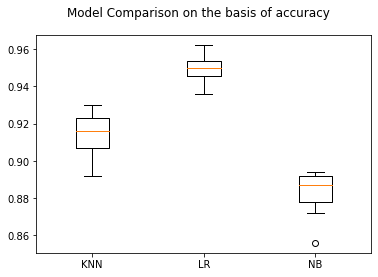

In [641]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))

# Evaluate each model in turn
final_results = []
model_names = []
scoring = 'accuracy'
for model_name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12000)
    scores = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    final_results.append(scores)
    model_names.append(model_name)
    msg = "Model Name: %s, Mean of Accuracy : %f, Std of Accuracy: %f" % (model_name, scores.mean(), scores.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Model Comparison on the basis of accuracy')
ax = fig.add_subplot(111)
plt.boxplot(final_results)
ax.set_xticklabels(model_names)
plt.show()

## Summary


- The aim of the Thera Bank is to convert there liability customers into loan customers. 
- They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. 
- Three classification algorithms were used in this study. 
- From the above graph , it seems like <strong>'Logistic Regression'</strong> algorithm have the highest accuracy and we can choose that as our final model